In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import linear_model


In [2]:
os.chdir('U:\\ProjectDataset')

In [3]:
tar=pd.read_excel('survival_LUSC.xlsx')

In [11]:
dt=pd.read_excel('PCA_LUSC_L.xlsx')

In [14]:
dt=dt.set_index(dt.columns[0])

In [71]:
from sklearn.linear_model import LassoCV
from sklearn.cross_validation import train_test_split

In [93]:
Y=tar

In [94]:
#split the data to 70/30 percentage 
X_train,X_test,Y_train,Y_test=train_test_split(dt,Y,test_size=0.3,random_state=42)
print(X_train.shape,Y_train.shape)           
print(X_test.shape,Y_test.shape)

(350, 19) (350,)
(151, 19) (151,)


In [95]:
import numpy as np
tar=np.array(tar)
tar=tar.flatten()

In [96]:
lasso=LassoCV(cv=5,random_state=0).fit(dt,tar)

In [97]:
lasso.score(dt,tar)

0.6333491670969913

In [98]:
lasso_coef=lasso.coef_
print(lasso_coef)

[-0.00000000e+00  0.00000000e+00  3.98372936e-03  8.58418648e-02
 -1.93998975e-03  6.46146009e-03  2.07116826e-02 -7.51388357e-02
 -5.89496480e-02  0.00000000e+00  0.00000000e+00  9.94601675e-01
  3.13866306e-02 -0.00000000e+00  0.00000000e+00  5.27750156e+00
  0.00000000e+00  0.00000000e+00 -3.16873596e-01]


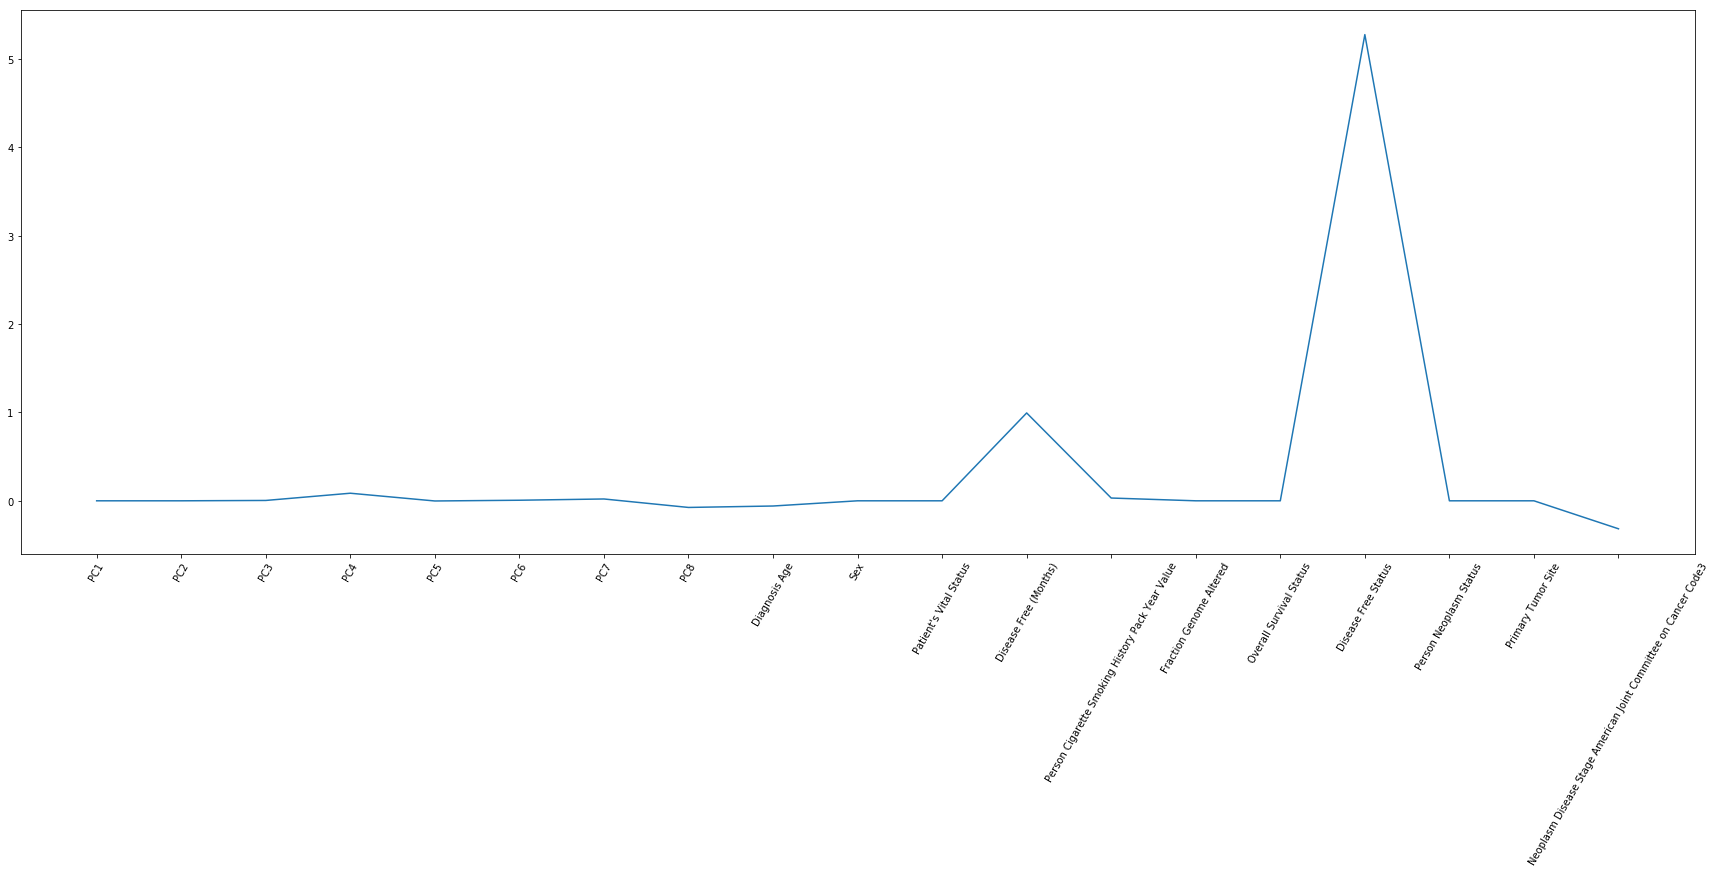

In [99]:
plt.figure(figsize=(30,10))
plt.plot(range(len(dt.columns)),lasso_coef)
plt.xticks(range(len(dt.columns)),dt.columns.values,rotation=60)
plt.show()

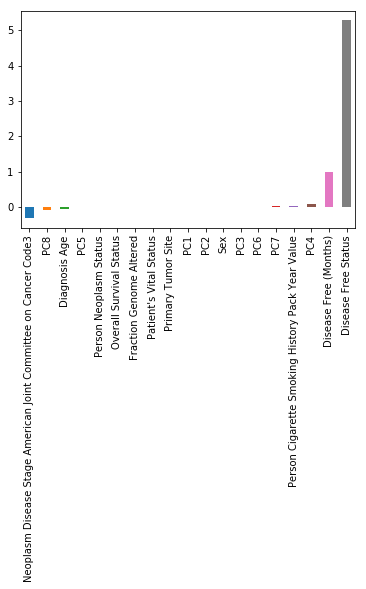

In [100]:
from pandas import Series
predictors=dt.columns
coef=Series(lasso_coef,predictors).sort_values()
coef.plot(kind='bar')


In [101]:
lasso.score(dt,tar)

0.6333491670969913

In [102]:
predictions=lasso.predict(dt)

In [103]:
predictions[0:5]

array([20.7083489 , 33.16341189, 62.54174084, 78.9824336 , 33.11382972])

In [104]:
from sklearn.metrics import mean_squared_error
import numpy as np
mse=np.sqrt(mean_squared_error(tar,predictions))

In [105]:
mse

19.175514139589843